In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_hotelreviews.csv')

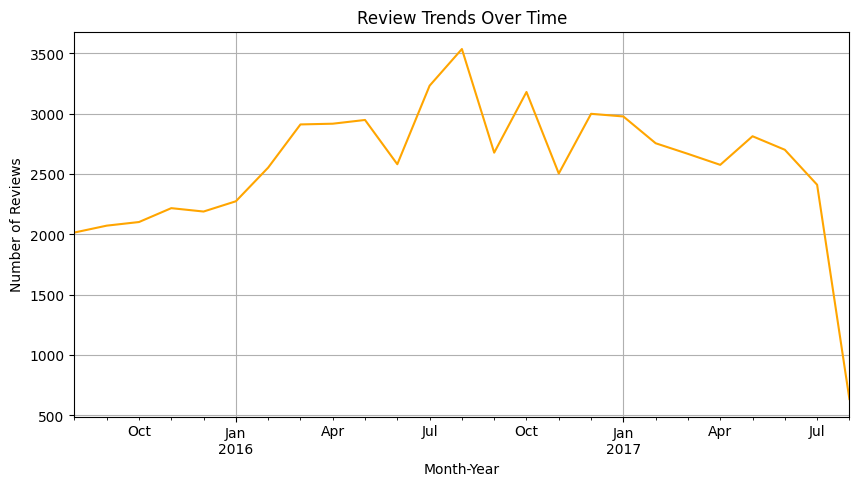

In [7]:
# Reviewing the number of reviews over time to ensure the relevancy of data

# I will first convert review date to datetime and extract the month and year / Then I will count the number of reviews per month
data['Review_Month'] = pd.to_datetime(data['Review_Date']).dt.to_period('M')
review_trends = data.groupby('Review_Month').size()

# Plotting the relationship
review_trends.plot(kind='line', figsize=(10, 5), title="Review Trends Over Time", color='orange')
plt.xlabel("Month-Year")
plt.ylabel("Number of Reviews")
plt.grid()
plt.show()

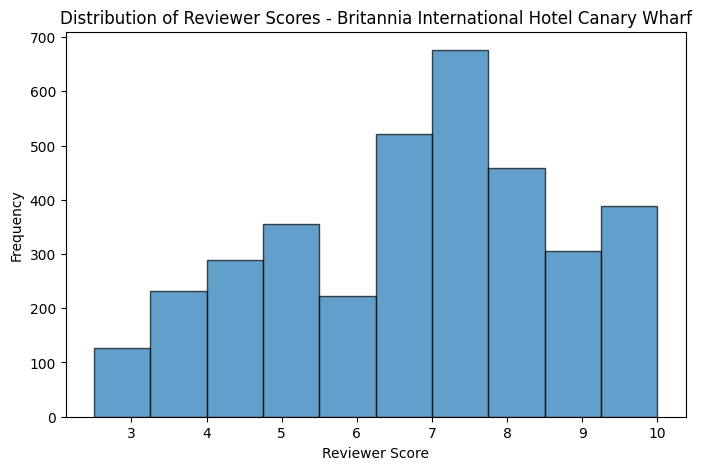

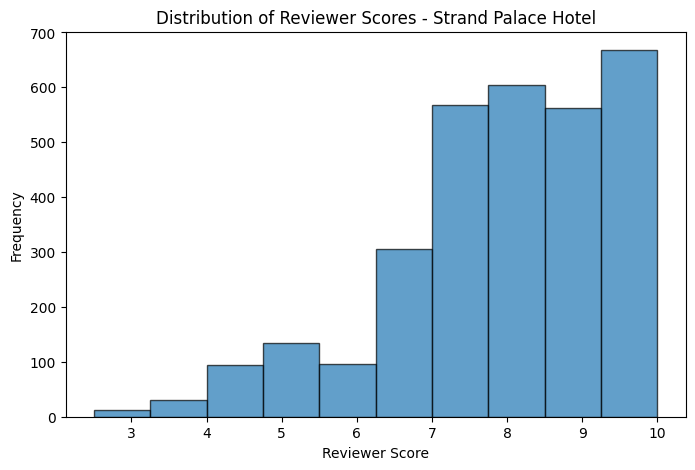

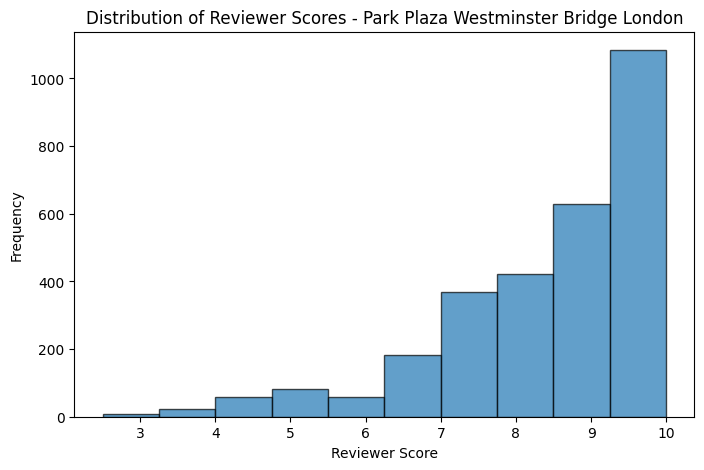

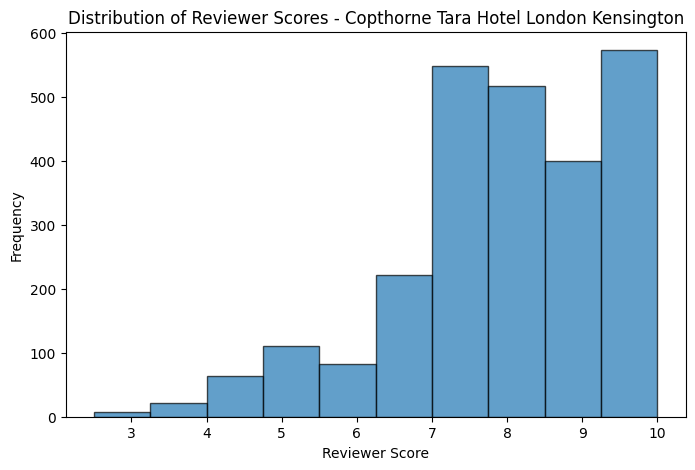

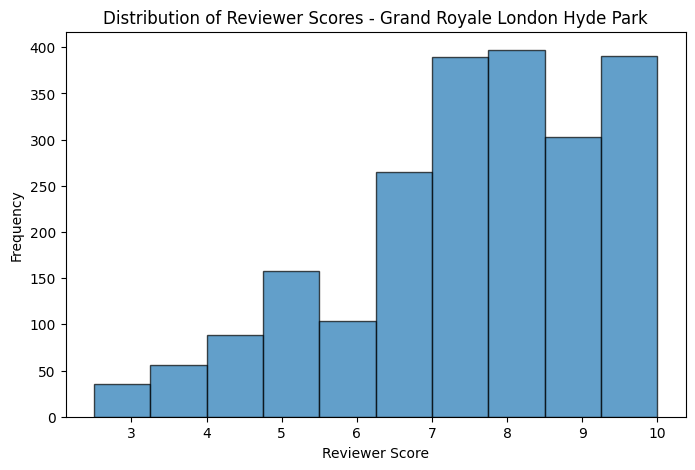

In [ ]:
# Distribution of Reviewer Scores for Popular Hotels

# Selecting the top 5 hotels with the most reviews
top_hotels = data['Hotel_Name'].value_counts().head(5).index

# Looping through each hotel and plot the distribution
for hotel in top_hotels:
    hotel_data = data[data['Hotel_Name'] == hotel]
    hotel_data['Reviewer_Score'].hist(bins=10, figsize=(8, 5), alpha=0.7, edgecolor='black')
    plt.title(f"Distribution of Reviewer Scores - {hotel}")
    plt.xlabel("Reviewer Score")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()


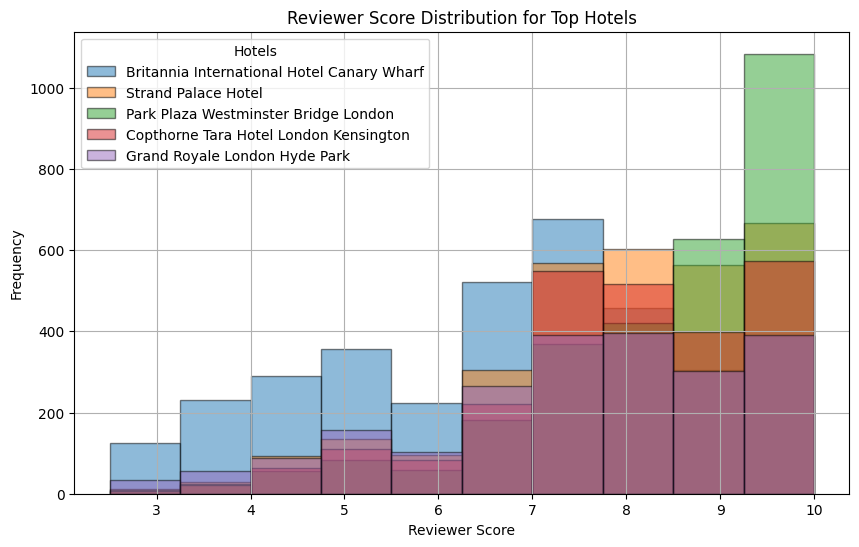

In [9]:
# Plotting the overlayed histograms for the top 5 hotels with different colors
top_hotels = data['Hotel_Name'].value_counts().head(5).index

plt.figure(figsize=(10, 6))
for hotel in top_hotels:
    hotel_data = data[data['Hotel_Name'] == hotel]
    plt.hist(hotel_data['Reviewer_Score'], bins=10, alpha=0.5, label=hotel, edgecolor='black')

plt.title("Reviewer Score Distribution for Top Hotels")
plt.xlabel("Reviewer Score")
plt.ylabel("Frequency")
plt.legend(title="Hotels")
plt.grid()
plt.show()


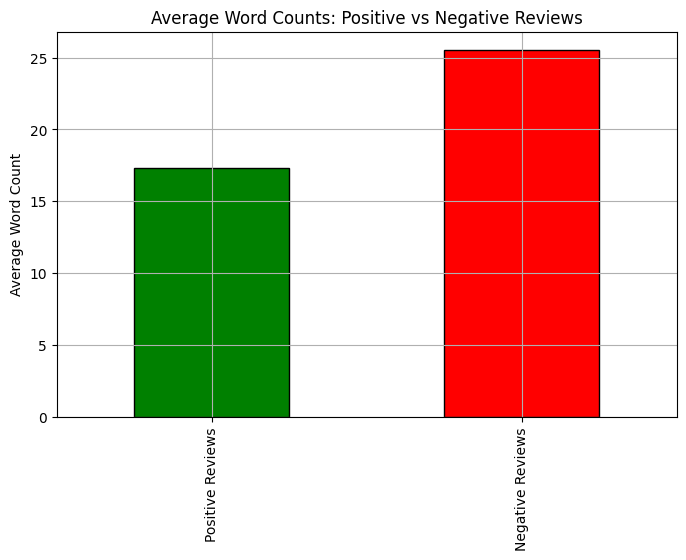

In [10]:
# Bar graph for an overview of Positive vs Negative reviews
word_counts = data[['Review_Total_Positive_Word_Counts', 'Review_Total_Negative_Word_Counts']].mean()
word_counts.plot(kind='bar', figsize=(8, 5), color=['green', 'red'], edgecolor='black')
plt.title("Average Word Counts: Positive vs Negative Reviews")
plt.ylabel("Average Word Count")
plt.xticks([0, 1], ['Positive Reviews', 'Negative Reviews'])
plt.grid()
plt.show()


In [13]:
# Most Common Words in Reviews (Pre-Sentiment Analysis)

from collections import Counter
from wordcloud import STOPWORDS

# Combine positive and negative reviews into a single text
all_reviews = " ".join(data['Positive_Review'].astype(str)) + " " + " ".join(data['Negative_Review'].astype(str))

# Remove stopwords
stopwords = set(STOPWORDS)
words = [word for word in all_reviews.lower().split() if word not in stopwords]

# Count the most common words
word_counts = Counter(words).most_common(20)
print("Most Common Words in Reviews:", word_counts)


Most Common Words in Reviews: [('room', 50170), ('staff', 29494), ('hotel', 25839), ('location', 25810), ('breakfast', 19153), ('good', 18384), ('t', 15740), ('great', 13998), ('bed', 12965), ('rooms', 10810), ('friendly', 10229), ('nice', 9668), ('clean', 9555), ('small', 9364), ('helpful', 8842), ('comfortable', 8337), ('excellent', 7784), ('bar', 7373), ('nothing', 7235), ('service', 6667)]


In [17]:
# Hotel Rankings by Average Reviewer Score

hotel_rankings = data.groupby('Hotel_Name')['Reviewer_Score'].mean().sort_values(ascending=False)
print("Top 5 Highest-rated Hotels:", hotel_rankings.head(5))
print("Top 5 Lowest-rated Hotels:", hotel_rankings.tail(5))

Top 5 Highest-rated Hotels: Hotel_Name
Intercontinental London The O2    9.372028
Hotel Esther a                    9.121815
citizenM Tower of London          9.025530
citizenM London Bankside          8.988213
Mondrian London                   8.969209
Name: Reviewer_Score, dtype: float64
Top 5 Lowest-rated Hotels: Hotel_Name
Mercure Paris Terminus Nord                   7.276791
Hilton London Metropole                       7.249845
The Cumberland A Guoman Hotel                 7.221242
Shaftesbury Premier London Paddington         7.094387
Britannia International Hotel Canary Wharf    6.771916
Name: Reviewer_Score, dtype: float64
